# Titanic challenge

This problem is proposed by kaggle competition the main objectif is to predict which passengers survived the Titanic shipwreck.

The dataset used in this notebook are proposed by kaggle : https://www.kaggle.com/c/titanic

Steps
Acquiring the data
Analysing the data
Visualizing the data
Completing the data
Correcting the data
Classifying using a model


In [1224]:
#importing the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Acquire the data

In [1225]:
#importing the dataset
trainning_dataset = pd.read_csv('train.csv')
testing_dataset   = pd.read_csv('test.csv')
dataset           = trainning_dataset.append(testing_dataset)

In [1226]:
#dataset shapes
print(" training dataset shape", trainning_dataset.shape)
print(" testing dataset shape", trainning_dataset.shape)
print(" all dataset shape", dataset.shape)

 training dataset shape (891, 12)
 testing dataset shape (891, 12)
 all dataset shape (1309, 12)


# Analysing the data

In [1227]:
#let's take sight to our dataset
trainning_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1228]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [1229]:
print(dataset.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [1230]:
# which features are numerical and categorical
categorical_values = list()
numerical_values   = list()
for elm in dataset:
    if dataset[elm].dtype == 'object':
        categorical_values.append(elm)
    else:
        numerical_values.append(elm)
        pass
    pass
pass

In [1231]:
print("categorical values", categorical_values)
print("numerical values", numerical_values)

categorical values ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical values ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [1232]:
for elm in dataset:
    if dataset[elm].dtype == 'object':
        print("the element",elm," contiens", len(dataset[elm].unique()), "category")
        pass
    pass
pass

the element Name  contiens 1307 category
the element Sex  contiens 2 category
the element Ticket  contiens 929 category
the element Cabin  contiens 187 category
the element Embarked  contiens 4 category


let's take a look at Ticket and Cabin because they contient lot of categories 

In [1233]:
dataset['Ticket'][:40].values

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '349909', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651'], dtype=object)

it's a mixed data type (numerical + categorical)

In [1234]:
print(dataset['Survived'][dataset['Survived'] == 0].count(), "Deaths")
print(dataset['Survived'][dataset['Survived'] == 1].count(), "Alives")

549 Deaths
342 Alives


In [1235]:
dataset[["Parch", "PassengerId"]].groupby(['Parch']).count()

,PassengerId
Parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


In [1236]:
dataset[["SibSp", "PassengerId"]].groupby(['SibSp']).count()

,PassengerId
SibSp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


Using groupby on Sibsb & Parch we can know the nombre of passengers with their parents & siblings

In [1237]:
# which features contiens null values
for elm in dataset:
    print(elm," : ",float((dataset[elm].isnull().sum()/1309)),"%")
    pass
pass

PassengerId  :  0.0 %
Survived  :  0.31932773109243695 %
Pclass  :  0.0 %
Name  :  0.0 %
Sex  :  0.0 %
Age  :  0.20091673032849502 %
SibSp  :  0.0 %
Parch  :  0.0 %
Ticket  :  0.0 %
Fare  :  0.0007639419404125286 %
Cabin  :  0.774637127578304 %
Embarked  :  0.0015278838808250573 %


Survived, Age, Fare, Cabin, Embarked need correction and we could drop the column Cabin because it contiens lot of null values, 
to avoid the over fitting of the most appeared element it's much better to drop it all

In [1238]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Visualization of our data 

Text(0.5, 1.0, 'Sublim/spouses vs Survived')

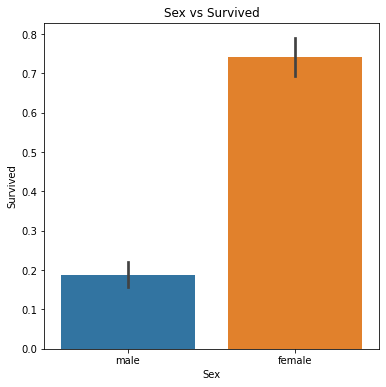

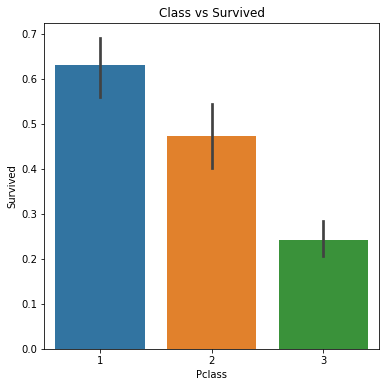

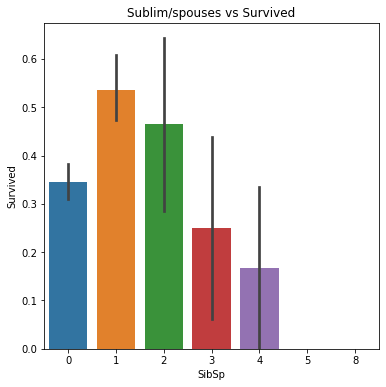

In [1239]:
#let take a look to our data using matplotlib and seaborn
plt.figure(figsize=(6,6))
sns.barplot(x = dataset['Sex'], y = dataset['Survived'])
plt.title('Sex vs Survived')

plt.figure(figsize=(6,6))
sns.barplot(x = dataset['Pclass'], y = dataset['Survived'])
plt.title('Class vs Survived')

plt.figure(figsize=(6,6))
sns.barplot(x = dataset['SibSp'], y = dataset['Survived'])
plt.title('Sublim/spouses vs Survived')

Text(0.5, 1.0, 'Sex vs Survived')

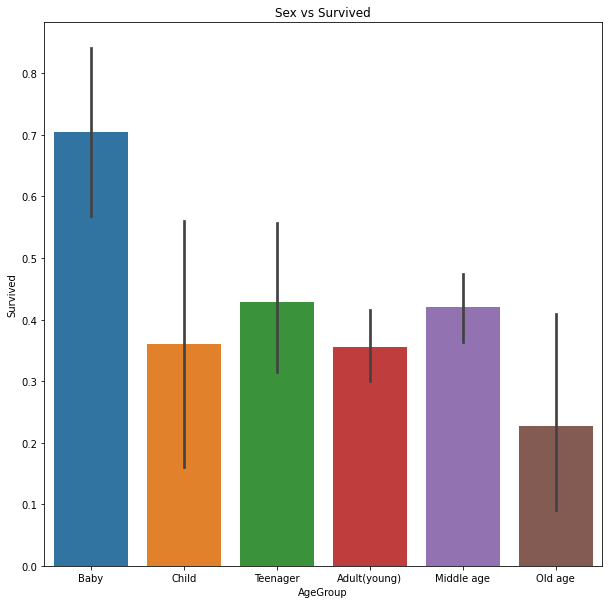

In [1240]:
bins=[0,5,12,18,30,60,np.inf]
labels=['Baby','Child','Teenager','Adult(young)','Middle age','Old age']
dataset['AgeGroup'] = pd.cut(dataset["Age"], bins, labels = labels)

plt.figure(figsize=(10,10))
sns.barplot(x = dataset['AgeGroup'] , y = dataset['Survived'])
plt.title('Sex vs Survived')

# Correlation between the columns

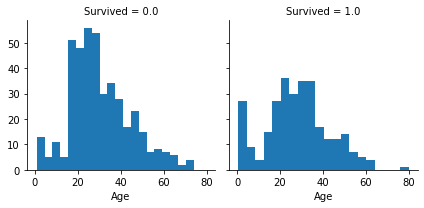

In [1241]:
g = sns.FacetGrid(dataset, col='Survived')
g.map(plt.hist, 'Age', bins=20)

we can understand that lot of people in the middle age (between 20 and 50) they pass away

C:\Users\Supernova\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


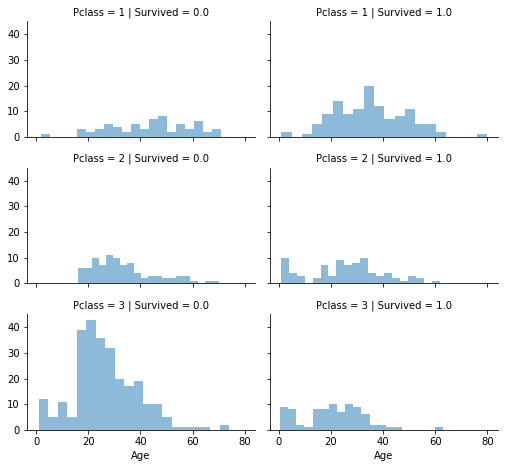

In [1242]:
grid = sns.FacetGrid(dataset, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

lot of people in class == 3 between the age 20 and 50 are deaths

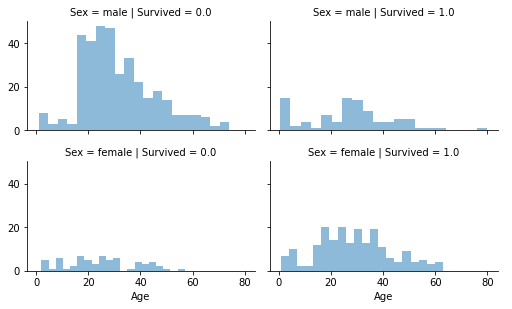

In [1243]:
grid = sns.FacetGrid(dataset, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

most of people are men

C:\Users\Supernova\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Supernova\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


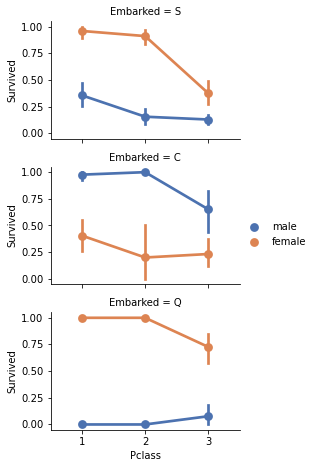

In [1244]:
grid = sns.FacetGrid(dataset, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Groupby method will allows us to know the percent of people stay alive per Pclass, Sex, Parch and sib sp

In [1245]:
dataset.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0.0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1.0,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [1246]:
dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [1247]:
dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1248]:
dataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000
7,9,NaN


In [1249]:
dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


# Correction of the data

In [1250]:
#to correct our data we should drop Cabin because it contiens lot of null values also ticket because it contiens lot of duplication
trainning_dataset = trainning_dataset.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)
testing_dataset   = testing_dataset.drop(['PassengerId', 'Ticket', 'Cabin'], axis = 1)

In [1251]:
for dataset in [trainning_dataset, testing_dataset]:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    pass
pass

In [1252]:
pd.crosstab(trainning_dataset['Title'], trainning_dataset['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [1253]:
pd.crosstab(testing_dataset['Title'], testing_dataset['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [1254]:
for dataset in [trainning_dataset, testing_dataset]:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 
                                                 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    pass
pass

In [1255]:
trainning_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [1256]:
to_numerical = LabelEncoder()
trainning_dataset["Title code"] = to_numerical.fit_transform(trainning_dataset["Title"])

In [1257]:
to_numerical = LabelEncoder()
testing_dataset["Title code"] = to_numerical.fit_transform(testing_dataset["Title"])

In [1258]:
to_numerical = LabelEncoder()
testing_dataset["Sex"] = to_numerical.fit_transform(testing_dataset["Sex"])
trainning_dataset["Sex"] = to_numerical.fit_transform(trainning_dataset["Sex"])

In [1259]:
to_numerical = LabelEncoder()
testing_dataset["Embarked"] = to_numerical.fit_transform(testing_dataset["Embarked"])

In [1260]:
to_numerical = LabelEncoder()
trainning_dataset['Embarked'] = trainning_dataset['Embarked'].replace(np.nan, 'S')
trainning_dataset['Embarked'] = to_numerical.fit_transform(trainning_dataset["Embarked"])

In [1261]:
trainning_dataset = trainning_dataset.drop(['Title', 'Name'], axis = 1)
testing_dataset   = testing_dataset.drop(['Title', 'Name'], axis = 1)

In [1262]:
trainning_dataset['Age'].isnull().sum()

177

In [1263]:
testing_dataset['Age'].isnull().sum()

86

In [1264]:
trainning_dataset['Age'] = trainning_dataset['Age'].fillna(trainning_dataset['Age'].median())
testing_dataset['Age']   = testing_dataset['Age'].fillna(testing_dataset['Age'].median())

In [1265]:
#let's check of all the values are complet
trainning_dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title code    0
dtype: int64

In [1266]:
testing_dataset.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          1
Embarked      0
Title code    0
dtype: int64

In [1267]:
 testing_dataset['Fare'].mode()

0    7.75
dtype: float64

In [1268]:
testing_dataset['Fare'] = testing_dataset['Fare'].fillna(7.75)

In [1269]:
testing_dataset.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title code    0
dtype: int64

# model selection & prediction

In [1357]:
from sklearn.model_selection import train_test_split
y = trainning_dataset.Survived
X = trainning_dataset.drop('Survived', axis = 1)
y_test = pd.read_csv('gender_submission.csv')

In [1358]:
y_test = y_test['Survived']

In [1359]:
MAE = list()
MSE = list()
RMSE = list()
Var = list()

## Logstic regression

In [1360]:
from sklearn.linear_model import LogisticRegression

In [1361]:
logstic_regression = LogisticRegression()
logstic_regression.fit(X, y)
y_pred = logstic_regression.predict(testing_dataset)

C:\Users\Supernova\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1362]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.05980861244019139
MSE: 0.05980861244019139
RMSE: 0.24455799402225925
VarScore: 0.7415660862683022


In [1363]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# K neighbors classifier

In [1364]:
from sklearn.neighbors import KNeighborsClassifier

In [1365]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X, y)
y_pred = knn.predict(testing_dataset)

In [1366]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.35406698564593303
MSE: 0.35406698564593303
RMSE: 0.5950352810093978
VarScore: -0.504748713889988


In [1367]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# Neural netowrk 

In [1368]:
def build_model(dense_dimension = 200):
    model = Sequential()
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension,  activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(dense_dimension, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam',loss='mean_squared_error')
    return model

In [1369]:
model = build_model(200)
model.fit(x = X, y = y,
          batch_size=200,epochs=500)
y_pred = model.predict(testing_dataset)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

5/5 [==============================] - 0s 3ms/step - loss: 5.5224
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1108
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6968
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3725
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2971
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.2623
Epoch 7/500
5/5 [=======================

5/5 [==============================] - 0s 3ms/step - loss: 0.1305
Epoch 96/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1252
Epoch 97/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1237
Epoch 98/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1271
Epoch 99/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1234
Epoch 100/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1237
Epoch 101/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1243
Epoch 102/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1262
Epoch 103/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1247
Epoch 104/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1240
Epoch 105/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1242
Epoch 106/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1224
Epoch 107/500
5/5 [==============================] - 0s 3m

5/5 [==============================] - 0s 3ms/step - loss: 0.1045
Epoch 198/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 199/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1059
Epoch 200/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1038
Epoch 201/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1058
Epoch 202/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1073
Epoch 203/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1052
Epoch 204/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1030
Epoch 205/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1017
Epoch 206/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 207/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1002
Epoch 208/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1009
Epoch 209/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 4ms/step - loss: 0.1282
Epoch 300/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1257
Epoch 301/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1208
Epoch 302/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1167
Epoch 303/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1091
Epoch 304/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1018
Epoch 305/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1025
Epoch 306/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 307/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0973
Epoch 308/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0997
Epoch 309/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 310/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1019
Epoch 311/500
5/5 [==============================] - 0

5/5 [==============================] - 0s 5ms/step - loss: 0.0967
Epoch 402/500
5/5 [==============================] - 0s 4ms/step - loss: 0.1106
Epoch 403/500
5/5 [==============================] - 0s 5ms/step - loss: 0.1054
Epoch 404/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0955
Epoch 405/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0895
Epoch 406/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0854
Epoch 407/500
5/5 [==============================] - 0s 5ms/step - loss: 0.0843
Epoch 408/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0805
Epoch 409/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0834
Epoch 410/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0813
Epoch 411/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0778
Epoch 412/500
5/5 [==============================] - 0s 4ms/step - loss: 0.0763
Epoch 413/500
5/5 [==============================] - 0

In [1370]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.23822549496149048
MSE: 0.1278123061444633
RMSE: 0.3575084700317788
VarScore: 0.4482772317140298


In [1371]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# Support vector Machine 

In [1372]:
from sklearn import svm

In [1373]:
linear_svc = svm.LinearSVC()
linear_svc.fit(X, y)
y_pred = linear_svc.predict(testing_dataset)

C:\Users\Supernova\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [1374]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.13875598086124402
MSE: 0.13875598086124402
RMSE: 0.37249963873974967
VarScore: 0.4039374752671153


In [1375]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# Random Forest

In [1379]:
from sklearn.tree import DecisionTreeRegressor

In [1380]:
forest = DecisionTreeRegressor(random_state=1)
forest.fit(X,y)
y_pred = forest.predict(testing_dataset)

In [1381]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.27661483253588515
MSE: 0.2725154505582137
RMSE: 0.5220301241865394
VarScore: -0.14310691923064267


In [1382]:
MAE.append(metrics.mean_absolute_error(y_test, y_pred))
MSE.append(metrics.mean_squared_error(y_test, y_pred))
RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Var.append(metrics.explained_variance_score(y_test,y_pred))

# DashBoard

In [1385]:
Dict = {'models' : ["Logstic Regression", "K neighbor classifier ","Neural Network","Support Vector Machine", "Random Forest"],
       "MAE" : MAE,
       "MSE": MSE,
       "RMSE": RMSE,
       "VarScore":Var}
data = pd.DataFrame(Dict)

In [1386]:
data

,models,MAE,MSE,RMSE,VarScore
0,Logstic Regression,0.059809,0.059809,0.244558,0.741566
1,K neighbor classifier,0.354067,0.354067,0.595035,-0.504749
2,Neural Network,0.238225,0.127812,0.357508,0.448277
3,Support Vector Machine,0.138756,0.138756,0.372500,0.403937
4,Random Forest,0.276615,0.272515,0.522030,-0.143107
